In [2]:
# Generate a line chart from a CSV file
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [20]:
df = pd.read_csv("SAC_ray_8_3x3_260_280_single_agent_2024-01-28_23-15-50_ray_SAC_WindFarmEnvRayWrapper_cbb98_00000_0_fcnet_activation=relu,fcnet_hiddens=256_256,use_lstm=False,vf_share_layers=False,fcnet_act_2024-01-28_23-15-51.csv")
df4x4_1_sa_SAC = pd.read_csv("4x4_single_agent_SAC_WindFarmEnvRayWrapper_b6a91_00000_0_alpha=0.3000,lr_schedule=0_0_001_10000_0_0001_100000_1e-05,fcnet_activation=relu,fcnet_hid_2024-01-14_16-00-53.csv")
df4x4_2_sa_SAC = pd.read_csv("4x4_single_agent_SAC_WindFarmEnvRayWrapper_b6a91_00001_1_alpha=0.3000,lr_schedule=0_0_001_10000_0_0001_100000_1e-05,fcnet_activation=relu,fcnet_hid_2024-01-14_16-00-53.csv")

df4x4_1_sa_SAC.drop(["Wall time"], axis=1, inplace=True)
df4x4_2_sa_SAC.drop(["Wall time"], axis=1, inplace=True)
df4x4_2_sa_SAC.head()

,Step,Value
0,15824,415.560120
1,25990,397.724915
2,30176,405.935852
3,34868,400.811890
4,41584,391.178009


In [3]:
from scipy.ndimage.filters import gaussian_filter1d

/tmp/ipykernel_20086/1567020577.py:1: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


In [43]:
df_3x3_SAC = pd.read_csv("/home/lollo/git/utilities/tools/SAC_ray_8_3x3_260_280_single_agent_2024-01-28_23-15-50_ray_SAC_WindFarmEnvRayWrapper_cbb98_00000_0_fcnet_activation=relu,fcnet_hiddens=256_256,use_lstm=False,vf_share_layers=False,fcnet_act_2024-01-28_23-15-51.csv")
df_3x3_PPO = pd.read_csv("/home/lollo/Downloads/3x3_PPO.csv")
smoothed_df = df_3x3_SAC['Value'].rolling(window=100).mean()
df_3x3_SAC['smoothed_g'] = gaussian_filter1d(df_3x3_SAC['Value'], sigma=5)
smoothed_df = df_3x3_PPO['Value'].rolling(window=100).mean()
df_3x3_PPO['smoothed_g'] = gaussian_filter1d(df_3x3_PPO['Value'], sigma=5)

In [61]:
df_3x3_SAC = pd.read_csv("//home/lollo/Downloads/3x3_ma_nosum/3x3_ma_singlerew.csv")
df_4x4_SAC = pd.read_csv("/home/lollo/Downloads/4x4_multiagent/SAC_ray_38_4x4_260_280_multiagent_2024-01-24_15-28-15_ray_SAC_MultiAgentWindFarmEnvRayWrapper_cfd1b_00000_0_fcnet_activation=relu,fcnet_hiddens=256_256,use_lstm=False,vf_share_layers=False_2024-01-24_15-28-15.csv")
smoothed_df = df_3x3_SAC['Value'].rolling(window=100).mean()
df_3x3_SAC['smoothed_g'] = gaussian_filter1d(df_3x3_SAC['Value'], sigma=5)
smoothed_df = df_4x4_SAC['Value'].rolling(window=100).mean()
df_4x4_SAC['smoothed_g'] = gaussian_filter1d(df_4x4_SAC['Value'], sigma=5)

AttributeError: 'Axes' object has no attribute 'break_barh'

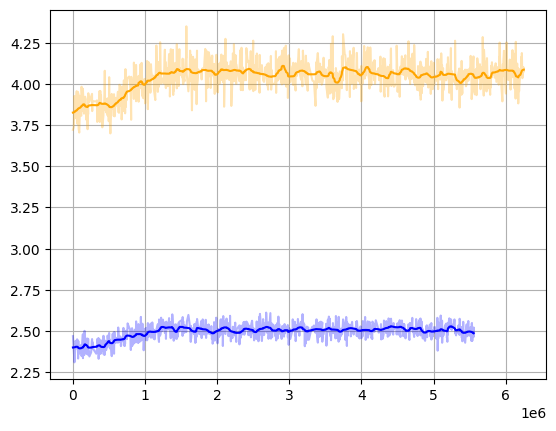

In [70]:
import matplotlib.pyplot as plt

plt.plot(df_3x3_SAC['Step'], df_3x3_SAC['smoothed_g'], color='blue')
plt.plot(df_4x4_SAC['Step'], df_4x4_SAC['smoothed_g'], color='orange')

plt.plot(df_3x3_SAC['Step'], df_3x3_SAC['Value'], color='blue', alpha=0.3)
plt.plot(df_4x4_SAC['Step'], df_4x4_SAC['Value'], color='orange', alpha=0.3)
plt.grid(True)


plt.legend(['SAC', 'PPO'])
plt.xlabel('Steps')
plt.ylabel('Reward')

plt.title("Multi Agent - 3x3 Setup vs 4x4 Setup")
# plt.savefig("3x3_vs_4x4.png")
plt.show()

In [4]:
def plot_and_save(df, title, name):    
    smoothed_df = df['Value'].rolling(window=100).mean()
    df['smoothed_g'] = gaussian_filter1d(df['Value'], sigma=5)
    plt.plot(df['Step'], df['smoothed_g'])

    plt.plot(df['Step'], df['Value'], color='gray', alpha=0.3)
    plt.grid(True)
    plt.xlabel('Steps')
    plt.ylabel('Reward')

    plt.title(title)
    plt.savefig(name+".png")
    plt.show()


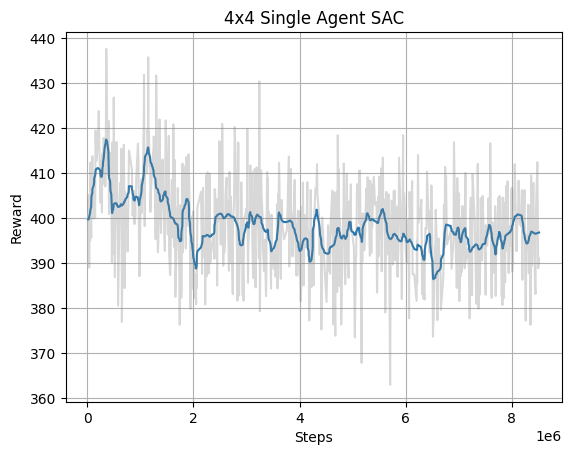

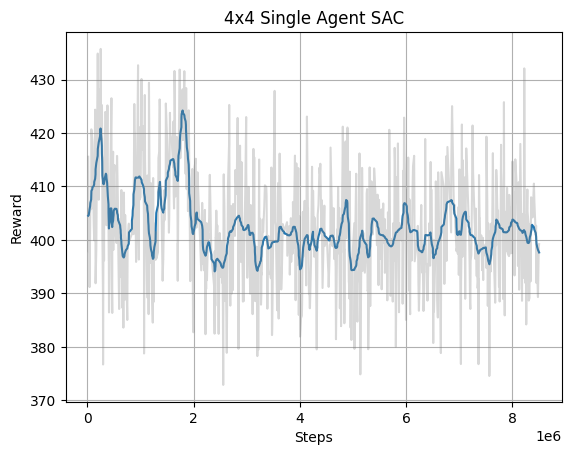

In [21]:
plot_and_save(df4x4_1_ma_SAC, "4x4 Multi Agent SAC", "4x4_multi_agent_SAC")
# plot_and_save(df4x4_2_sa_SAC, "4x4 Single Agent SAC", "4x4_single_agent_SAC_2")

In [15]:
import glob
df_list = []
for file in glob.glob("/home/lollo/Downloads/4x4_multiagent/*.csv"):
    df = pd.read_csv(file)
    df_list.append(df)
len(df_list)


1

In [16]:
df_list[0]["Value"]*=100

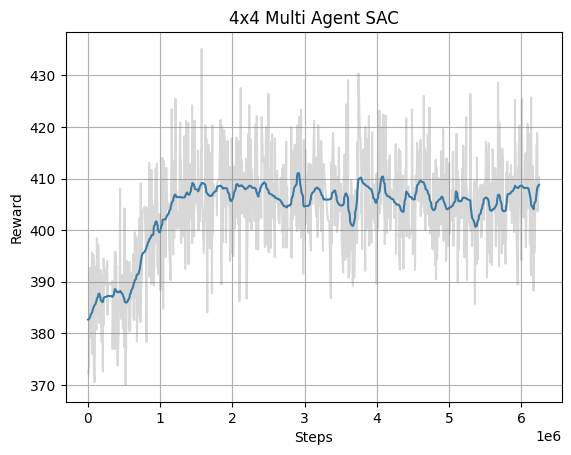

In [17]:
for i, df in enumerate(df_list):
    plot_and_save(df, "4x4 Multi Agent SAC", f"4x4_multiagent_SAC_{i}")